In [2]:
import requests

url = 'https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json'
response = requests.get(url)
print(response.status_code)
contents = response.text

200


In [6]:
import json

info = json.loads(contents)

In [7]:
import numpy as np
import pandas as pd

data = pd.DataFrame(info)

In [8]:
data

,time-tag,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
0,1749-01,96.7,-1.0,-1.00,-1.0,-1.00,-1.0
1,1749-02,104.3,-1.0,-1.00,-1.0,-1.00,-1.0
2,1749-03,116.7,-1.0,-1.00,-1.0,-1.00,-1.0
3,1749-04,92.8,-1.0,-1.00,-1.0,-1.00,-1.0
4,1749-05,141.7,-1.0,-1.00,-1.0,-1.00,-1.0
...,...,...,...,...,...,...,...
3293,2023-06,160.5,-1.0,140.57,-1.0,162.39,-1.0
3294,2023-07,159.1,-1.0,143.65,-1.0,177.53,-1.0
3295,2023-08,114.8,-1.0,99.87,-1.0,153.92,-1.0
3296,2023-09,133.6,-1.0,129.93,-1.0,155.74,-1.0


In [9]:
len(data)/12

274.8333333333333

In [12]:
x = data['time-tag']
y = data['f10.7']

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3298 entries, 0 to 3297
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time-tag           3298 non-null   object 
 1   ssn                3298 non-null   float64
 2   smoothed_ssn       3298 non-null   float64
 3   observed_swpc_ssn  3298 non-null   float64
 4   smoothed_swpc_ssn  3298 non-null   float64
 5   f10.7              3298 non-null   float64
 6   smoothed_f10.7     3298 non-null   float64
dtypes: float64(6), object(1)
memory usage: 180.5+ KB


In [19]:
def time_to_float(time):
    year = float(time.split('-')[0])
    month = float(time.split('-')[1])
    return year + month/12

In [22]:
x = x.apply(time_to_float)

(2003.0, 2020.0)

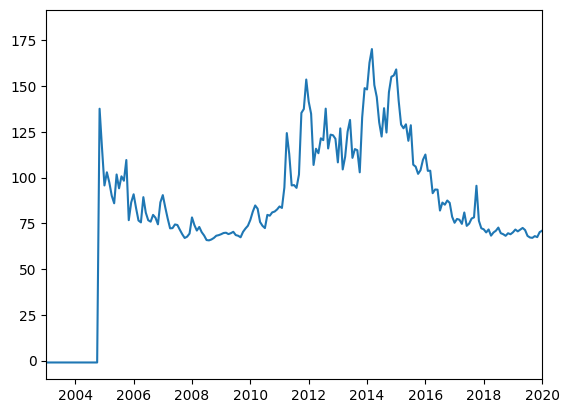

In [29]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlim(2003, 2020)

In [41]:
df = pd.DataFrame({'x': x, 'y': y})
df = df[df['y']>-1]

In [43]:
len(df)

229

In [44]:
df.head()

,x,y
3069,2004.833333,137.56
3070,2004.916667,115.98
3071,2005.000000,95.66
3072,2005.083333,102.86
3073,2005.166667,97.30


In [45]:
import pickle

with open('./data/solar_cycle_data.pkl', 'wb') as f:
    pickle.dump(df, f)